<a href="https://colab.research.google.com/github/pquynhvu/TDA/blob/main/mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import numpy as np  # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import Constant
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau
keras.layers.Layer.weights
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy.signal import convolve2d

In [127]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
class_labels = list(set(y_train))
# add color channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2]))
# normalize
x_train, x_test = x_train/255.0, x_test/255.0
# one-hot encoding
label_train, label_test = to_categorical(y_train), to_categorical(y_test)

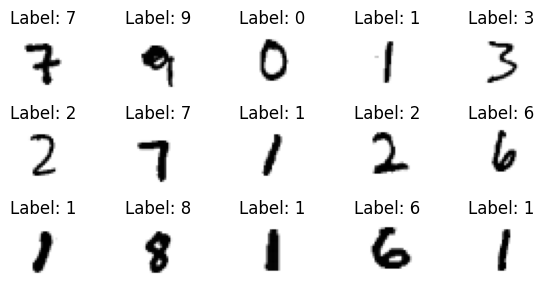

In [128]:
num_row, num_col = 3, 5

idx_10 = np.random.randint(low=0, high=x_train.shape[0], size=(num_row*num_col,))
x_train_10, y_train_10 = x_train[idx_10], y_train[idx_10]

# visualize
fig, axs = plt.subplots(num_row, num_col, figsize=(6, 3))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(('Label: {}'.format(y_train_10[i])))
    ax.imshow(x_train_10[i], cmap=matplotlib.cm.binary)
    ax.axis('off')
plt.tight_layout()
plt.show()

Ref: https://cs231n.github.io/convolutional-networks/ for number of padding/dimension

In [129]:
num_filter = [2, 3]
iter = 10000
bias = np.random.normal(loc=0.0, scale=1.0, size=len(num_filter))

mnist_cnn = models.Sequential() # initialize model
mnist_cnn.add(Conv2D(filters = num_filter[0],
                     kernel_size = (3,3),
                     padding = 'same',
                     strides=(1,1),
                     bias_initializer=Constant(bias[0]),
                     activation="relu",
                     input_shape = (28,28,1)))
mnist_cnn.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
mnist_cnn.add(Conv2D(filters = num_filter[1],
                     kernel_size = (2,2),
                     padding = 'Same',
                     strides=(1,1),
                     bias_initializer=Constant(bias[1]),
                     activation ='relu'))
mnist_cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) # strides = (1,1)
mnist_cnn.add(Flatten())
mnist_cnn.add(Dense(10, activation = "softmax"))
mnist_cnn.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [130]:
mnist_cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 2)           │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 27, 27, 2)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 27, 27, 3)           │              27 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 507)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,127 (20.03 KB)

 Trainable params: 5,127 (20.03 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
x_train_subset = x_train[:100]
label_train_subset = label_train[:100]

In [132]:
mnist_cnn_fit = mnist_cnn.fit(x_train_subset, label_train_subset, epochs = 10, batch_size = 10)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0931 - loss: 2.5521
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1107 - loss: 2.3173
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2687 - loss: 2.1952
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3499 - loss: 2.1021 
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3210 - loss: 2.0804 
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4049 - loss: 1.9381
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4472 - loss: 1.7576 
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5873 - loss: 1.5463
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6552 - loss: 1.3148
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6509 - loss: 1.0954


In [133]:
layer_names = [layer.name for layer in mnist_cnn.layers]
layer_names

['conv2d_4',
 'max_pooling2d_4',
 'conv2d_5',
 'max_pooling2d_5',
 'flatten_2',
 'dense_2']

In [134]:
conv1_W, conv1_b = mnist_cnn.layers[layer_names.index('conv2d_4')].get_weights()
conv2_W, conv2_b = mnist_cnn.layers[layer_names.index('conv2d_5')].get_weights()
dense_W, dense_b = mnist_cnn.layers[layer_names.index('dense_2')].get_weights()

In [135]:
def same_padding(image, filter, stride):
    sample_size, img_height, img_width = image.shape[0], image.shape[1], image.shape[2]
    kernel_height, kernel_width = filter.shape[0], filter.shape[1]
    stride_height, stride_width = stride

    pad_height = ((stride_height-1)*img_height + kernel_height - stride_height) // 2
    pad_width = ((stride_width-1)*img_width + kernel_width - stride_width) // 2

    output = []
    for n in range(sample_size):
      padded_img = np.pad(image[n,:,:,:], ((pad_height, pad_height), (pad_width, pad_width), (0,0)), mode='constant', constant_values=0)
      output.append(padded_img)

    return np.array(output)

In [ ]:
def get_start_index(output_height, output_width, stride_height, stride_width, kernel_height, kernel_width):
    h_start, h_end, w_start, w_end = [], [], [], []
    i, j = 0, 0

    while i <= output_height and j <= output_width:
        h_start_value = i*stride_height
        h_end_value = h_start_value + kernel_height
        w_start_value = j*stride_width
        w_end_value = w_start_value + kernel_width
        if h_end_value <= output_height or w_end_value <= output_width:
           h_start.append(h_start_value)
           h_end.append(h_end_value)
           w_start.append(w_start_value)
           w_end.append(w_end_value)
        i+=1
        j+=1
    return h_start, h_end, w_start, w_end

In [136]:
def reLU(image):
  return np.maximum(0, image)

In [141]:
def Convo2D(image, filter, stride, bias, padding):
    if padding:
       padded_img = same_padding(image, filter, stride)
    else:
       padded_img = image

    sample_size, img_height, img_width, channels = padded_img.shape
    kernel_height, kernel_width, _, num_filters = filter.shape
    stride_height, stride_width = stride

    output_height = (img_height - kernel_height) // stride_height + 1
    output_width = (img_width - kernel_width) // stride_width + 1
    output = np.zeros((sample_size, output_height, output_width, num_filters))

    # convolution
    for f in range(num_filters):
        for n in range(sample_size):
            # Process each channel separately
            for c in range(channels):
                # Extract the current image and filter for the current channel
                image = padded_img[n, :, :, c]
                kernel = filters[:, :, c, f]

                # Apply convolution on the current image and filter using scipy.signal.convolve2d
                conv_result = convolve2d(image, kernel, mode='valid', boundary='fill', fillvalue=0)

                # Apply stride manually by downsampling
                conv_result_strided = conv_result[::stride_height, ::stride_width]

                # Store the strided convolution result in the output
                output[n, :, :, f] += conv_result_strided

        # Add the bias for each filter to the result
        output[n, :, :, f] += bias[f]

    # Apply ReLU activation to the output
    return reLU(output)

In [140]:
import numpy as np
from scipy.signal import convolve2d

# Function to implement ReLU activation
def reLU(x):
    return np.maximum(0, x)

# Convolution function using scipy.signal.convolve2d with stride and padding
def Convo2D_scipy(images, filters, stride, bias, padding=True):
    # Initialize the output
    batch_size, img_height, img_width, channels = images.shape
    kernel_height, kernel_width, _, num_filters = filters.shape
    stride_height, stride_width = stride

    # Apply padding if necessary
    if padding:
        pad_height = (kernel_height - 1) // 2
        pad_width = (kernel_width - 1) // 2
        padded_images = np.pad(images, ((0, 0), (pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant')
    else:
        padded_images = images

    # Calculate output dimensions
    output_height = (img_height + 2 * pad_height - kernel_height) // stride_height + 1
    output_width = (img_width + 2 * pad_width - kernel_width) // stride_width + 1
    output = np.zeros((batch_size, output_height, output_width, num_filters))

    # Perform the convolution for each filter and image
    for f in range(num_filters):
        for n in range(batch_size):
            # Process each channel separately
            for c in range(channels):
                # Extract the current image and filter for the current channel
                image = padded_images[n, :, :, c]
                kernel = filters[:, :, c, f]

                # Apply convolution on the current image and filter using scipy.signal.convolve2d
                conv_result = convolve2d(image, kernel, mode='valid', boundary='fill', fillvalue=0)

                # Apply stride manually by downsampling
                conv_result_strided = conv_result[::stride_height, ::stride_width]

                # Store the strided convolution result in the output
                output[n, :, :, f] += conv_result_strided

        # Add the bias for each filter to the result
        output[n, :, :, f] += bias[f]

    # Apply ReLU activation to the output
    return reLU(output)

# Example usage

# Parameters
batch_size = 100
img_height = 28
img_width = 28
channels = 3  # RGB channels
num_filters = 2
kernel_size = 3
stride = (2, 2)  # Example stride of (2, 2)
padding = True

# Initialize input images (random for this example)
images = np.random.randn(batch_size, img_height, img_width, channels)

# Initialize filters (random for this example)
filters = np.random.randn(kernel_size, kernel_size, channels, num_filters)

# Initialize biases (one per filter)
bias = np.random.randn(num_filters)

# Perform the convolution
output = Convo2D_scipy(images, filters, stride, bias, padding)

print(f"Output shape: {output.shape}")


Output shape: (100, 14, 14, 2)


In [138]:
def max_pooling(image, pool_size, stride):
    sample_size, img_height, img_width, channels = image.shape
    kernel_height, kernel_width = pool_size
    stride_height, stride_width = stride

    output_width = (img_width - kernel_width) // stride_width + 1
    output_height = (img_height - kernel_height) // stride_width + 1
    pooled_img = np.zeros((sample_size, output_height, output_width, channels))

    # max-pool
    for n in range(sample_size):
        sub_img = image[n]
        for c in range(channels):
          for i in range(output_height):
            for j in range(output_width):
                h_start_idx = i * stride_height
                h_end_idx = h_start_idx + kernel_height
                w_start_idx = j * stride_width
                w_end_idx = w_start_idx + kernel_width

                subsection = sub_img[h_start_idx:h_end_idx, w_start_idx:w_end_idx, c]
                pooled_img[n, i, j, c] = np.max(subsection)

    return pooled_img

In [142]:
convo1_output = Convo2D(x_train_subset, filter=conv1_W, stride=(1,1), bias=conv1_b, padding=True)
convo1_maxpool = max_pooling(convo1_output, pool_size=(2,2), stride=(1,1))
convo2_output = Convo2D(convo1_maxpool, filter=conv2_W, stride=(1,1), bias=conv2_b, padding=True)
convo2_maxpool = max_pooling(convo2_output, pool_size=(2,2), stride=(2,2))

ValueError: operands could not be broadcast together with shapes (26,26) (25,25) (26,26) 

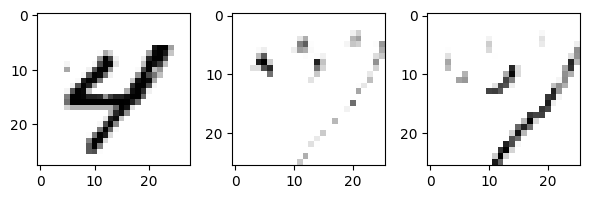

In [143]:
idx=89
fig, axs = plt.subplots(1, 3, figsize=(6, 3))
axs[0].imshow(x_train_subset[idx], cmap=matplotlib.cm.binary)
axs[1].imshow(convo2_output[idx,:,:,0], cmap=matplotlib.cm.binary)
axs[2].imshow(convo2_output[idx,:,:,1], cmap=matplotlib.cm.binary)
ax.axis('off')
plt.tight_layout()
plt.show()

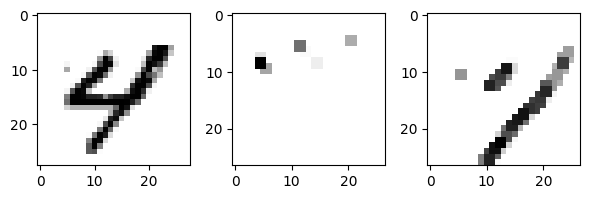

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(6, 3))
axs[0].imshow(x_train_subset[idx], cmap=matplotlib.cm.binary)
axs[1].imshow(convo1_maxpool[idx,:,:,0], cmap=matplotlib.cm.binary)
axs[2].imshow(convo1_maxpool[idx,:,:,1], cmap=matplotlib.cm.binary)
#axs[3].imshow(convo2_output[idx,:,:,2], cmap=matplotlib.cm.binary)
ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
def plot_images(data, labels, nrows=0, images_per_row=0):
    fig, axes = plt.subplots(nrows, images_per_row, figsize=(10, 10))
    axes = axes.ravel()

    for i in range(nrows):
      for j in range(images_per_row):
        ax = axes[i*images_per_row + j]
        ax.set_title(('Label {}'.format(labels[i])))
        ax.imshow(data[i, :, :, j], cmap=matplotlib.cm.binary)
        #ax.set_title(f"Image {j+1}, Channel {i+1}")
        ax.axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

In [ ]:
idx = np.random.randint(low=0, high=x_cnn.shape[0], size=(10,))
x_cnn_sampled = x_cnn[idx,:,:,:]
y_train_sampled = y_train[idx]
plot_images(x_cnn_sampled, y_train_sampled, x_cnn_sampled.shape[0], 10)

In [ ]:
!pip install gudhi
import gudhi as gd

In [ ]:
x_cnn_avg = np.mean(x_cnn, axis=3)
x_cnn_sampled_avg = x_cnn_avg[idx,:,:]
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(('Label {}'.format(y_train_sampled[i])))
    ax.imshow(x_cnn_sampled_avg[i], cmap=matplotlib.cm.binary)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
idx_barcode = np.random.randint(low=0, high=x_cnn.shape[0], size=(200,))
x_cnn_sampled_avg_barcode = x_cnn_avg[idx_barcode,:,:]
n_classes = x_cnn_sampled_avg_barcode.shape[0]
barcode_data = []

for i in range(n_classes):
    alpha_complex = gd.AlphaComplex(points=x_cnn_sampled_avg_barcode[i]) # create an AlphaComplex object for class i
    simplex_tree = alpha_complex.create_simplex_tree() # create a simplex tree from the AlphaComplex
    pers = simplex_tree.persistence() # compute the persistent homology
    birth, death = pers[0], pers[1]
    barcode_data.append([birth, death])

In [ ]:
barcode_data = pd.DataFrame(barcode_data, columns=['birth', 'death'])
barcode_data['class'] = y_train[idx_barcode]
barcode_data[:20]

In [ ]:
n_classes = x_cnn_sampled_avg.shape[0]
barcode_data = []

fig, ax = plt.subplots(n_classes, 2, figsize=(12, 3 * n_classes))  # 2 columns for diagrams and barcodes
for i in range(n_classes):
    alpha_complex = gd.AlphaComplex(points=x_cnn_sampled_avg[i]) # create an AlphaComplex object for class i
    simplex_tree = alpha_complex.create_simplex_tree() # create a simplex tree from the AlphaComplex
    pers = simplex_tree.persistence() # compute the persistent homology
    # plotting
    gd.plot_persistence_diagram(pers, axes=ax[i, 0])
    ax[i, 0].set_title('Label {} - Persistence Diagram'.format(y_train_sampled[i]))
    gd.plot_persistence_barcode(pers, axes=ax[i, 1])

    birth, death = pers[0], pers[1]
    barcode_data.append([birth, death])

plt.tight_layout()
plt.show()

In [ ]:
mnist_cnn.add(Flatten())
#mnist_cnn.add(Dense(256, activation = "relu"))
mnist_cnn.add(Dense(10, activation = "softmax"))
mnist_cnn.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics=["accuracy"])
y_pred = mnist_cnn.fit(x_train, label_train, epochs = 30, batch_size = 250, validation_data=(x_test, label_test))

In [ ]:
plt.plot(y_pred.history['val_loss'], color='r', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
Y_pred = mnist_cnn.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(label_test,axis = 1)
cm = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="OrRd",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
!pip install nibabel
import nibabel